In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
%matplotlib inline 

sns.set_style("darkgrid")

In [3]:
file_path = "train.csv"
data_titanic = pd.read_csv(file_path)

display(data_titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("\n--- Informasi Tipe Data & Data Hilang ---")
data_titanic.info()

print("\n--- Ringkasan Statistik Kolom Numerik ---")
display(data_titanic.describe())


--- Informasi Tipe Data & Data Hilang ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Ringkasan Statistik Kolom Numerik ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print("\n--- Distribusi Selamat (1) vs. Tidak Selamat (0) ---")
display(data_titanic['Survived'].value_counts())

print("\n--- Distribusi Jenis Kelamin ---")
display(data_titanic['Sex'].value_counts())

print("\n--- Distribusi Kelas Penumpang ---")
display(data_titanic['Pclass'].value_counts())


--- Distribusi Selamat (1) vs. Tidak Selamat (0) ---


Survived
0    549
1    342
Name: count, dtype: int64


--- Distribusi Jenis Kelamin ---


Sex
male      577
female    314
Name: count, dtype: int64


--- Distribusi Kelas Penumpang ---


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [6]:
print("\n--- Persentase Selamat berdasarkan Jenis Kelamin ---")
# .mean() pada kolom 0/1 (Survived) adalah trik untuk mendapat persentase
display(data_titanic.groupby('Sex')['Survived'].mean())

print("\n--- Persentase Selamat berdasarkan Kelas Penumpang ---")
display(data_titanic.groupby('Pclass')['Survived'].mean())

print("\n--- Persentase Selamat berdasarkan Kelas DAN Jenis Kelamin ---")
# Menggunakan list ['Pclass', 'Sex'] untuk membuat Pivot Table multi-level
display(data_titanic.groupby(['Pclass', 'Sex'])['Survived'].mean())


--- Persentase Selamat berdasarkan Jenis Kelamin ---


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


--- Persentase Selamat berdasarkan Kelas Penumpang ---


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


--- Persentase Selamat berdasarkan Kelas DAN Jenis Kelamin ---


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [7]:
print(f"\n--- Data 'Age' yang hilang sebelum diisi: {data_titanic['Age'].isnull().sum()} baris ---")
# Mengisi nilai kosong (NA) dengan nilai rata-rata (mean) kolom 'Age'
data_titanic['Age'] = data_titanic['Age'].fillna(data_titanic['Age'].mean())
print(f"Data 'Age' yang hilang setelah diisi: {data_titanic['Age'].isnull().sum()} baris")


--- Data 'Age' yang hilang sebelum diisi: 177 baris ---
Data 'Age' yang hilang setelah diisi: 0 baris


In [8]:
print("\n--- Membuat Kolom Baru 'AgeGroup' ---")
# Membuat kategori umur (binning)
batas_umur = [0, 12, 18, 60, 100] # 0-12 (Anak), 13-18 (Remaja), 19-60 (Dewasa), 61+ (Lansia)
label_umur = ['Anak-anak', 'Remaja', 'Dewasa', 'Lansia']
data_titanic['AgeGroup'] = pd.cut(data_titanic['Age'], bins=batas_umur, labels=label_umur)

print("--- Membuat Kolom Baru 'FamilySize' ---")
# Menjumlahkan 'SibSp' dan 'Parch'
data_titanic['FamilySize'] = data_titanic['SibSp'] + data_titanic['Parch']


--- Membuat Kolom Baru 'AgeGroup' ---
--- Membuat Kolom Baru 'FamilySize' ---


In [26]:
print("\n--- Persentase Selamat berdasarkan Kelompok Umur ---")
display(data_titanic.groupby('AgeGroup', observed=True)['Survived'].mean())

print("\n--- Persentase Selamat berdasarkan Ukuran Keluarga ---")
display(data_titanic.groupby('FamilySize')['Survived'].mean())


--- Persentase Selamat berdasarkan Kelompok Umur ---


AgeGroup
Anak-anak    0.579710
Remaja       0.428571
Dewasa       0.365753
Lansia       0.227273
Name: Survived, dtype: float64


--- Persentase Selamat berdasarkan Ukuran Keluarga ---


FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

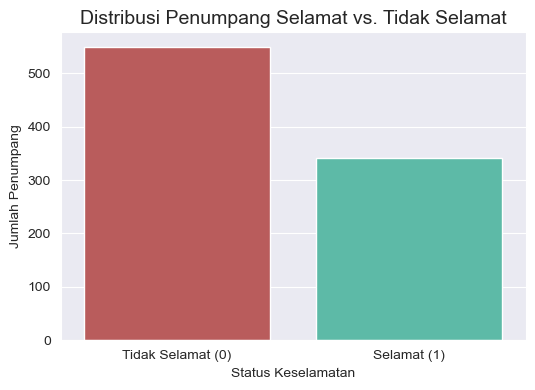

In [24]:

sns.set_style("darkgrid") 
plt.figure(figsize=(6, 4)) 


ax = sns.countplot(
    x='Survived', 
    data=data_titanic,
    palette=['#c94c4c', '#4ec9b0'],
    hue='Survived',   
    legend=False       
)

ax.set_title('Distribusi Penumpang Selamat vs. Tidak Selamat', fontsize=14)


ax.set_xticks([0, 1]) 
ax.set_xticklabels(['Tidak Selamat (0)', 'Selamat (1)'])
ax.set_xlabel('Status Keselamatan')
ax.set_ylabel('Jumlah Penumpang')
plt.show()

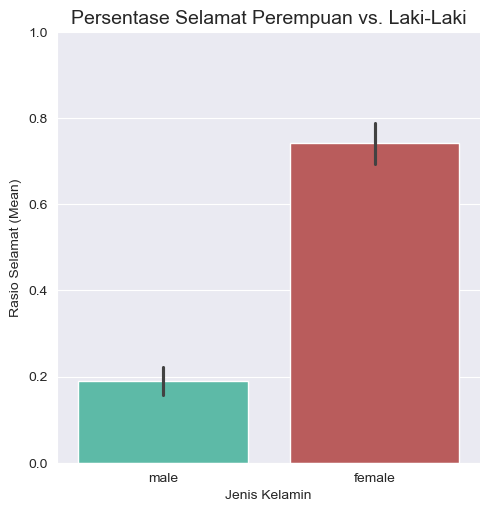

In [23]:
sns.catplot(
    x='Sex',
    y='Survived',
    data=data_titanic, 
    kind='bar',
    palette=['#4ec9b0', '#c94c4c'],
    hue='Sex',
    legend=False
)

plt.title('Persentase Selamat Perempuan vs. Laki-Laki', fontsize=14)
plt.ylabel('Rasio Selamat (Mean)') # Menjelaskan bahwa ini adalah rata-rata
plt.xlabel('Jenis Kelamin')
plt.ylim(0, 1)

plt.show()

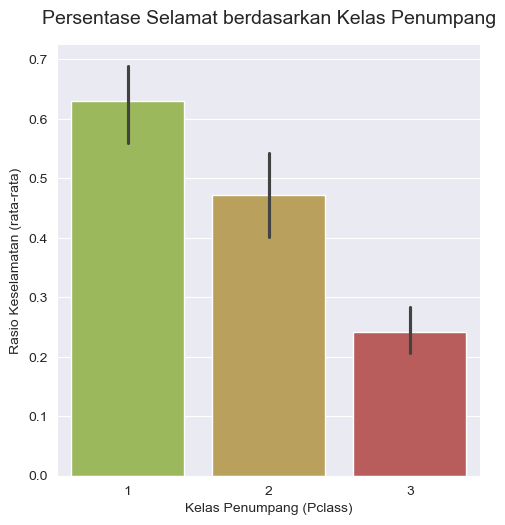

In [16]:
sns.catplot(
    x='Pclass',
    y='Survived',
    data=data_titanic,
    kind='bar',
    palette=['#a1c94c', '#c9a74c', '#c94c4c'],
    order=[1, 2, 3],
    hue='Pclass',
    legend=False,
)

plt.title('Persentase Selamat berdasarkan Kelas Penumpang', fontsize=14, y=1.03)
plt.ylabel('Rasio Keselamatan (rata-rata)')
plt.xlabel('Kelas Penumpang (Pclass)')
plt.show()

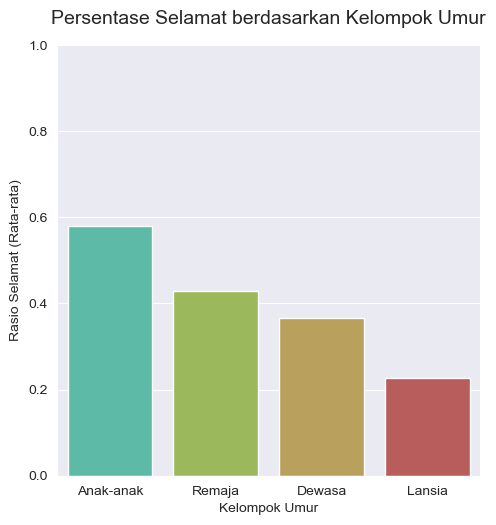

In [22]:
sns.catplot(
    x='AgeGroup',
    y='Survived',
    data=data_titanic,
    kind='bar',
    palette=['#4ec9b0', '#a1c94c', '#c9a74c', '#c94c4c'],
    hue='AgeGroup',
    legend=False,
    errorbar=None
)

# Menambahkan judul dan label
plt.title('Persentase Selamat berdasarkan Kelompok Umur', fontsize=14, y=1.03)
plt.ylabel('Rasio Selamat (Rata-rata)')
plt.xlabel('Kelompok Umur')
plt.ylim(0, 1)

plt.show()